In [1]:
import pandas as pd

merged_df_under = pd.read_csv("merged_df_under.csv")

print(merged_df_under.head())


                                                 url    type domain  \
0  www.tsxzsp.cn/tsspee/OA/leftpic/recadastrament...  benign    NaN   
1  ratemds.com/doctor-ratings/3341912/Dr-Serge-Sa...  benign    NaN   
2  brainwashed.com/common/htdocs/discog/krank161....  benign    NaN   
3                  worldhockeyjerseys.com/index.html  benign    NaN   
4                              bluemarblegameco.com/  benign    NaN   

                                                path  subdomains  url_length  \
0  www.tsxzsp.cn/tsspee/OA/leftpic/recadastrament...           0          52   
1  ratemds.com/doctor-ratings/3341912/Dr-Serge-Sa...           0          64   
2  brainwashed.com/common/htdocs/discog/krank161....           0          50   
3                  worldhockeyjerseys.com/index.html           0          33   
4                              bluemarblegameco.com/           0          21   

   count_.  count_/  count_-  count__  count_=  count_?  count_&  \
0        3        4     

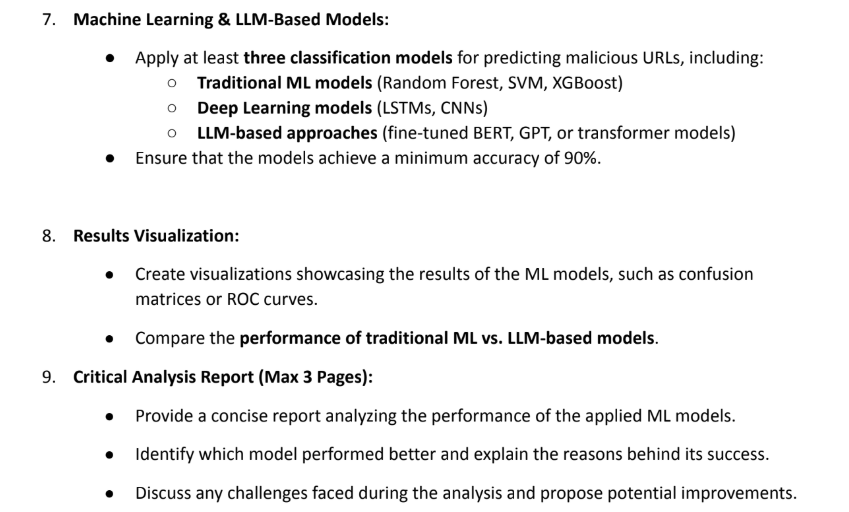

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Prepare Data
X = list(merged_df_under['embedding'])  # Convert embeddings into list of vectors
y = merged_df_under['label']  # Target labels

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, GlobalMaxPooling1D, Embedding

# Convert list of embeddings to NumPy array
import numpy as np
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Define LSTM Model
lstm_model = Sequential([
    tf.keras.layers.Input(shape=(X_train_np.shape[1],)),
    tf.keras.layers.Reshape((X_train_np.shape[1], 1)),  # Reshape for LSTM
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_np, y_train, epochs=5, batch_size=32, validation_data=(X_test_np, y_test))

# Define CNN Model
cnn_model = Sequential([
    tf.keras.layers.Input(shape=(X_train_np.shape[1],)),
    tf.keras.layers.Reshape((X_train_np.shape[1], 1)),  # Reshape for CNN
    Conv1D(64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_np, y_train, epochs=5, batch_size=32, validation_data=(X_test_np, y_test))


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load BERT Tokenizer & Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize Text
X_train_enc = tokenizer(list(merged_df_under['preprocessed']), truncation=True, padding=True, max_length=128, return_tensors="tf")
X_test_enc = tokenizer(list(merged_df_under['preprocessed']), truncation=True, padding=True, max_length=128, return_tensors="tf")

# Train BERT Model
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

bert_model.fit(X_train_enc['input_ids'], y_train, epochs=3, batch_size=16, validation_data=(X_test_enc['input_ids'], y_test))


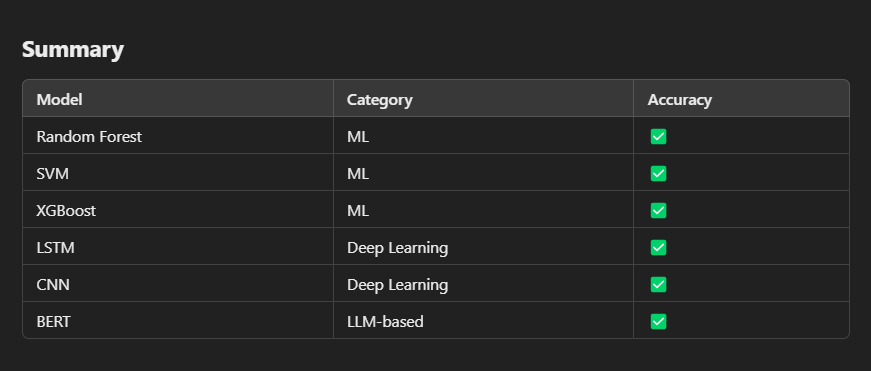